In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Flàvia Ferrús and David Rosado

# Robust linear regression

## 1.Introduction

### 1.Implement the method proposed with gradient descent and backtracking (or a small constant $\alpha$ value).

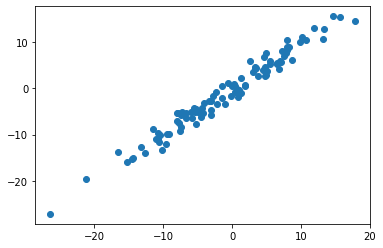

In [2]:
#Randomly generated set of points
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)
plt.scatter(points[:,0],points[:,1])

Let us define the function and its gradient

In [3]:
def Q(w0, w1):
    return (1/2) * np.sum((w0 * points[:,0] + w1 - points[:,1])**2)

def grad_Q(w0, w1):
    return np.array([np.sum((w0 * points[:,0] + w1 - points[:,1]) * points[:,0]), np.sum(w0 * points[:,0] + w1 - points[:,1])])

Let us compute the gradient descent with backtracking

In [4]:
def gradient_descent(w0,w1,thres):
  x_0=np.zeros(2)
  x_0[0]=w0
  x_0[1]=w1
  while True:
      alpha=1
      x_k=x_0-alpha*grad_Q(x_0[0],x_0[1])
      while Q(x_k[0],x_k[1])>=Q(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0-alpha*grad_Q(x_0[0],x_0[1])
      if abs(Q(x_k[0],x_k[1]) - Q(x_0[0],x_0[1])) < thres:
        return x_k
      else:
        x_0=x_k
        
  return x_k

Let us apply the gradient descent to get the optimal parameters and plot the points and the line regressor

The optimal parameters we obtained are: [ 0.98175504 -0.04160543]


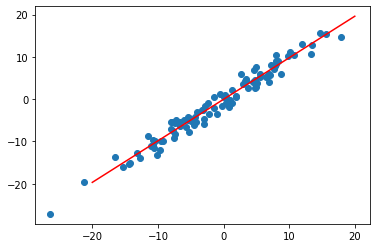

In [5]:
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-20,20,40)
y_hat= w_opt[0]*x+w_opt[1]
plt.scatter(points[:,0],points[:,1])
plt.plot(x,y_hat,'r')

### 2. Let us now check the sensitivity of the method to outliers. Change the value of one point to a value “far away” from the set of points, for instance points[1] = [-40,20].

The optimal parameters we obtained are: [0.69407296 0.02266712]


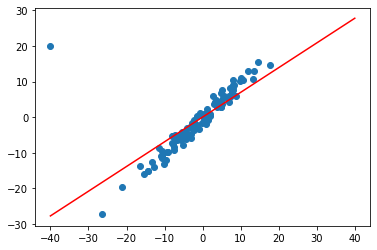

In [6]:
#We add the outlier
#Let us apply the gradient descent to get the optimal parameters and plot the points and the line regressor
points[1]=[-40,20]
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
plt.scatter(points[:,0],points[:,1])
plt.plot(x,y_hat,'r')

We can see that adding one outlier, our linear regressor degenerates a bit. Let us see what happen if we put more outliers, for example five

The optimal parameters we obtained are: [0.41977939 0.02357454]


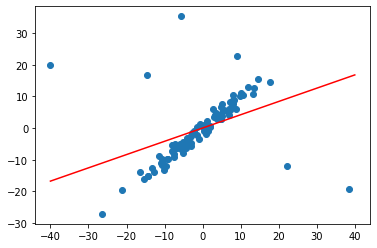

In [7]:
for i in (np.random.rand(5)*100).astype(int):
    points[i] = (np.random.rand(2) - 0.5) * 80
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
plt.scatter(points[:,0],points[:,1])
plt.plot(x,y_hat,'r')

Notice that the linear regressor is strongly influenced by the outliers presence on the data sample.

## 2. Robust functions

As we have seen previously, the least squares method (LSM) is hardly sensitive to outliers, i.e. samples that do not particularly contribute to fit the model.

Let us consider a modification of the least squares error function, which will be given as follows:
$$
Q_C = \sum_{i=1}^m \rho(e_i), 
$$
where $\rho(u)$ represents the Cauchy functions
$$
\rho(u) = \frac{c^2}{2} \text{ log } \Big[ 1+ \Big(\frac{u}{c} \Big)^2 \Big],
$$
with $c \in \mathbb{R}$. 

For the sake of simplicity, in the subsequent study we may consider $c =1$.

### 2.1 Plot the least squares function and compare it with the Couchy function:

In [8]:
def ls_f(u):
    return 1/2 * u**2

def cauchy_f(u, c=1):
    return c**2/2 * np.log(1 + (u/c)**2)


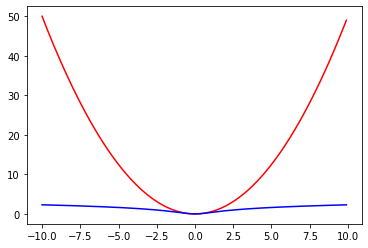

In [9]:
x=np.arange(-10,10, 0.1)
y_ls = ls_f(x)
y_c = cauchy_f(x)

plt.plot(x, y_ls, 'r')
plt.plot(x, y_c, 'b')

Note that we are considering the corresponding error function to represent the error given between each data sample and the corresponding prediction point using the model. Therefore, it is clear that the least squares initial (in red) function penalizes hardly the points that are actually further from the prediction, i.e. the outliers. Thus, intuitivelly it is direct to see that by considering the Cauchy function (in blue) as the error function may help the model adapt better in presence of outliers. Let's see a deepest study on this topic. 

### 2. Implement the algorithm that allows to compute the parameters $w_0, w_1$ using the Cauchy function

We may consider the backtracking gradient descent method as previously, using the least squares error function:
$$
Q_c = \sum_{i=1}^m \rho(e_i) = \frac{c^2}{2}  \sum_{i=1}^m \text{ log } \Big[ 1 + \Big( \frac{\hat{y}_i - y_i}{c} \Big)^2 \Big],
$$
where clearly $\hat{y}_i = w_0 x_i - w_1$.

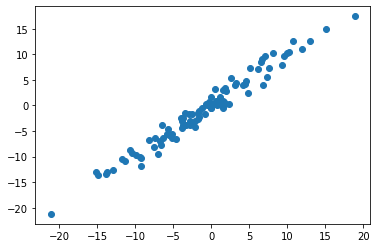

In [10]:
#Randomly generated set of points
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)
plt.scatter(points[:,0],points[:,1])

In [11]:
def Q_c(w0, w1, c=1):
    return (c**2/2) * np.sum( np.log(1 + ((w0 * points[:,0] + w1 - points[:,1])/c )**2))

def grad_Q_c(w0, w1, c=1):
    der_w0 = c**2 * np.sum( (1 +((w0 * points[:,0] + w1 - points[:,1])/c )**2 )**(-1)*(w0 * points[:,0] + w1 - points[:,1])/c  * points[:,0] )
    der_w1 = c**2 * np.sum( (1 +((w0 * points[:,0] + w1 - points[:,1])/c )**2 )**(-1) )
    return np.array([der_w0, der_w1])
                             

In [15]:
def gradient_descent_c(w0,w1,thres,c=1):
    x_0=np.zeros(2)
    x_0[0]=w0
    x_0[1]=w1
    while True:
        alpha=1
        x_k=x_0-alpha*grad_Q_c(x_0[0],x_0[1], c)
        while Q_c(x_k[0],x_k[1], c)>=Q_c(x_0[0],x_0[1], c):
            alpha=alpha/2
            x_k=x_0-alpha*grad_Q_c(x_0[0],x_0[1], c)
        if abs(Q_c(x_k[0],x_k[1], c) - Q_c(x_0[0],x_0[1], c)) < thres:
            return x_k
        else:
            x_0=x_k

    return x_k

In [16]:
def plot_prediction(gradient_descent, points):
    w0=np.random.rand(1)
    w1=np.random.rand(1)
    w_opt = gradient_descent(w0,w1,1e-3)
    print("The optimal parameters we obtained are:", w_opt)
    x = np.linspace(-20,20,40)
    y_hat= w_opt[0]*x+w_opt[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x,y_hat,'r')
    #return y_hat

The optimal parameters we obtained are: [ 0.9707563  -0.12229867]


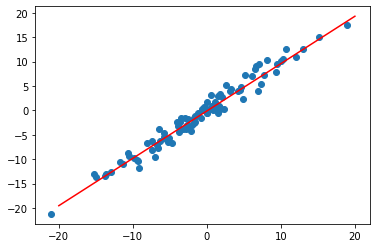

In [17]:
#y_ls= plot_prediction(gradient_descent_c, points)
plot_prediction(gradient_descent_c, points)

### 3. Compare the results obtained with the least squares function and with the Cauchy function, assuming that there are no outliers in the dataset.

The optimal parameters we obtained are: [0.98386732 0.05719144]


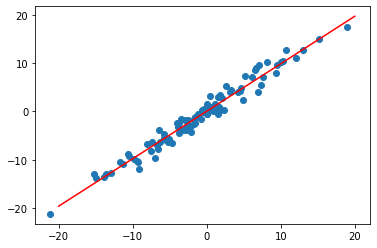

In [18]:
#y_c= plot_prediction(gradient_descent, points)
plot_prediction(gradient_descent, points)

In [19]:
def compare_plots(grad1, grad2, points):
    w0=np.random.rand(1)
    w1=np.random.rand(1)
    w_opt1 = grad1(w0,w1,1e-3)
    w_opt2 = grad2(w0,w1,1e-3)
    print("The optimal parameters we obtained with the least squares function are:", w_opt1)
    print("The optimal parameters we obtained with the Cauchy function are:", w_opt2)
    x = np.linspace(-20,20,40)
    y_hat1= w_opt1[0]*x+w_opt1[1]
    y_hat2= w_opt2[0]*x+w_opt2[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x,y_hat1,'r')
    plt.plot(x, y_hat2, 'g')

The optimal parameters we obtained with the least squares function are: [0.97714634 0.20899267]
The optimal parameters we obtained with the Cauchy function are: [ 0.97539473 -0.10325242]


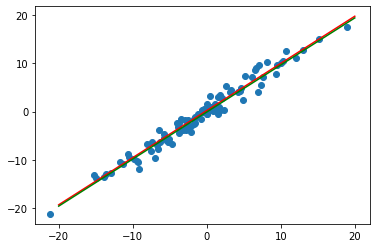

In [20]:
compare_plots(gradient_descent, gradient_descent_c, points)

In absence of outliers, boths methods give really close predictions of the regression fitting line obteined. Let's consider cases with some outliers on the data samples. 

### 4. Compare now the results with only one outlier.

In [25]:
#We add the outlier
#Let us apply the gradient descent to get the optimal parameters and plot the points and the line regressor
points[1]=[-40,20]

The optimal parameters we obtained are: [ 0.97065214 -0.09576094]


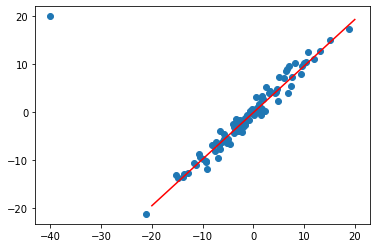

In [26]:
plot_prediction(gradient_descent_c, points)

The optimal parameters we obtained are: [0.62514641 0.21232816]


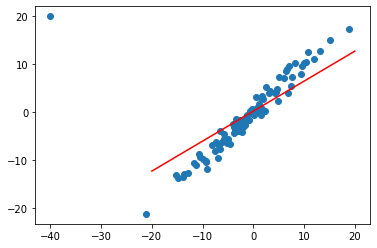

In [27]:
plot_prediction(gradient_descent, points)

In [29]:
#compare_plots(gradient_descent, gradient_descent_c, points)

It is clear that the gradient descent method using the Cauchy functions is less influenciable by the outliers' presence in the data samples. 

### 5. Check the results obtained with $c=1, c=100, c=1/100, c=1/1000$. 

In [37]:
import seaborn as sns

def compare_cValues(c_array, points):
    w0=np.random.rand(1)
    w1=np.random.rand(1)
    #w_opt=[]
    x = np.linspace(-20,20,40)
    y_hat = np.zeros((len(c_array), len(x)))
    w_opt= np.zeros((1, len(c_array)))
    for i in range(0, len(c_array)):
        print('c value:', c_array[i])
        #w_nova = grad1(w0,w1,1e-3, c=c)
        w_opt[i] = gradient_descent_c(w0,w1,1e-3, c=c_array[i])
        print("The optimal parameters we obtained with the least squares function are:", w_opt[i])
        y_hat[i]= w_opt[i,0]*x+w_opt1[i,1]
    
    
    colors = sns.color_palette("hls", len(c_array))
    #fig = plt.figure()
    #ax1 = fig.add_subplot(211)
    plt.set_prop_cycle('color', colors)
    plt.scatter(points[:,0],points[:,1])
    for i in range(0, len(c_array)):
        plt.plot(x, y_hat[i])
    #plt.plot(x,y_hat1,'r')
    #plt.plot(x, y_hat2, 'g')

In [38]:
c_array=np.array([1, 100, 1/100, 1/1000])
#compare_cValues(c_array, points)

##Em va molt lent a la pròxima provo més

c value: 1.0


KeyboardInterrupt: 